In [12]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [13]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [14]:
NUM_CLASSES = 10

# Dataset reading

In [15]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [16]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [19]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [21]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [22]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
30/46 [==================>...........] - ETA: 0s - loss: 2.4258 - accuracy: 0.0714 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 1s 8ms/step - loss: 2.3811 - accuracy: 0.0867 - val_loss: 2.2046 - val_accuracy: 0.1747
Epoch 2/1000
34/46 [=====================>........] - ETA: 0s - loss: 2.2094 - accuracy: 0.1859
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 2.1901 - accuracy: 0.1945 - val_loss: 2.0694 - val_accuracy: 0.2548
Epoch 3/1000
30/46 [==================>...........] - ETA: 0s - loss: 2.0788 - accuracy: 0.2307
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 4ms/step - loss: 2.0625 - accuracy: 0.2376 - val_loss: 1.9337 - val_accuracy: 0.2767
Epoch 4/1000
36/46 [======================>.......] - ETA: 0s - loss: 1.9588 - accuracy: 0.2691


31/46 [===================>..........] - ETA: 0s - loss: 1.1692 - accuracy: 0.5716
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 4ms/step - loss: 1.1677 - accuracy: 0.5703 - val_loss: 0.7761 - val_accuracy: 0.8341
Epoch 29/1000
31/46 [===================>..........] - ETA: 0s - loss: 1.1663 - accuracy: 0.5733
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 4ms/step - loss: 1.1667 - accuracy: 0.5698 - val_loss: 0.7625 - val_accuracy: 0.8284
Epoch 30/1000
31/46 [===================>..........] - ETA: 0s - loss: 1.1679 - accuracy: 0.5668
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 1.1671 - accuracy: 0.5649 - val_loss: 0.7455 - val_accuracy: 0.8492
Epoch 31/1000
32/46 [===================>..........] - ETA: 0s - loss: 1.1600 - accuracy: 0.5684
Epoch 31

29/46 [=================>............] - ETA: 0s - loss: 1.0234 - accuracy: 0.6207
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 4ms/step - loss: 0.9976 - accuracy: 0.6280 - val_loss: 0.5549 - val_accuracy: 0.8976
Epoch 56/1000
31/46 [===================>..........] - ETA: 0s - loss: 0.9998 - accuracy: 0.6348
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.9996 - accuracy: 0.6334 - val_loss: 0.5521 - val_accuracy: 0.8981
Epoch 57/1000
30/46 [==================>...........] - ETA: 0s - loss: 1.0036 - accuracy: 0.6346
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.9938 - accuracy: 0.6389 - val_loss: 0.5365 - val_accuracy: 0.9074
Epoch 58/1000
31/46 [===================>..........] - ETA: 0s - loss: 1.0017 - accuracy: 0.6263
Epoch 58

31/46 [===================>..........] - ETA: 0s - loss: 0.9377 - accuracy: 0.6540
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.9339 - accuracy: 0.6552 - val_loss: 0.4896 - val_accuracy: 0.9111
Epoch 83/1000
31/46 [===================>..........] - ETA: 0s - loss: 0.9533 - accuracy: 0.6547
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.9563 - accuracy: 0.6504 - val_loss: 0.4890 - val_accuracy: 0.9095
Epoch 84/1000
32/46 [===================>..........] - ETA: 0s - loss: 0.9237 - accuracy: 0.6731
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.9295 - accuracy: 0.6632 - val_loss: 0.4880 - val_accuracy: 0.9090
Epoch 85/1000
31/46 [===================>..........] - ETA: 0s - loss: 0.9252 - accuracy: 0.6507
Epoch 85

33/46 [====================>.........] - ETA: 0s - loss: 0.8875 - accuracy: 0.6624
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.8909 - accuracy: 0.6670 - val_loss: 0.4612 - val_accuracy: 0.9106
Epoch 110/1000
32/46 [===================>..........] - ETA: 0s - loss: 0.8799 - accuracy: 0.6768
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.8739 - accuracy: 0.6790 - val_loss: 0.4626 - val_accuracy: 0.9085
Epoch 111/1000
31/46 [===================>..........] - ETA: 0s - loss: 0.8740 - accuracy: 0.6741
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.8880 - accuracy: 0.6710 - val_loss: 0.4684 - val_accuracy: 0.9085
Epoch 112/1000
34/46 [=====================>........] - ETA: 0s - loss: 0.8826 - accuracy: 0.6714
Ep

Epoch 136/1000
31/46 [===================>..........] - ETA: 0s - loss: 0.8585 - accuracy: 0.6817
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.8638 - accuracy: 0.6790 - val_loss: 0.4431 - val_accuracy: 0.9173
Epoch 137/1000
32/46 [===================>..........] - ETA: 0s - loss: 0.8612 - accuracy: 0.6836
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.8628 - accuracy: 0.6785 - val_loss: 0.4446 - val_accuracy: 0.9184
Epoch 138/1000
33/46 [====================>.........] - ETA: 0s - loss: 0.8794 - accuracy: 0.6686
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.8819 - accuracy: 0.6677 - val_loss: 0.4431 - val_accuracy: 0.9204
Epoch 139/1000
31/46 [===================>..........] - ETA: 0s - loss: 0.8883 - accu

Epoch 163/1000
33/46 [====================>.........] - ETA: 0s - loss: 0.8424 - accuracy: 0.6821
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.8540 - accuracy: 0.6800 - val_loss: 0.4471 - val_accuracy: 0.9236
Epoch 164/1000
33/46 [====================>.........] - ETA: 0s - loss: 0.8801 - accuracy: 0.6783
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.8672 - accuracy: 0.6847 - val_loss: 0.4445 - val_accuracy: 0.9225
Epoch 165/1000
31/46 [===================>..........] - ETA: 0s - loss: 0.8494 - accuracy: 0.6827
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
46/46 [==============================] - 0s 3ms/step - loss: 0.8426 - accuracy: 0.6897 - val_loss: 0.4441 - val_accuracy: 0.9225
Epoch 166/1000
37/46 [=======================>......] - ETA: 0s - loss: 0.8459 - accu

In [23]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

16/16 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.9168


In [24]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [25]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 102ms/step
[1.2771007e-02 8.7217581e-01 6.9913138e-03 2.7595295e-03 6.8314016e-08
 1.4245667e-04 3.4324054e-04 1.0477057e-01 2.0430034e-05 2.5587688e-05]
1


# Confusion matrix

61/61 [==============================] - 0s 993us/step


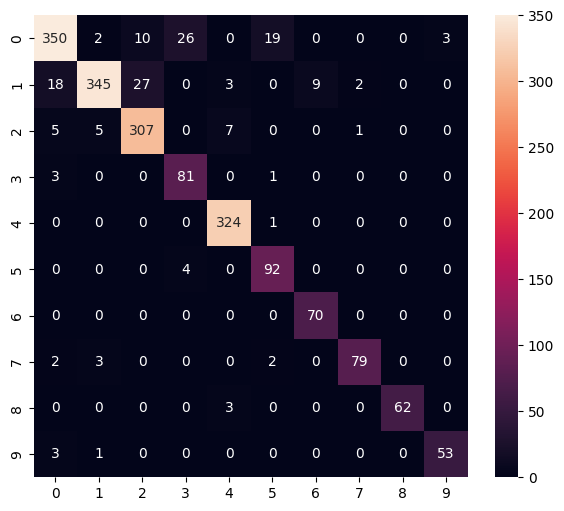

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       410
           1       0.97      0.85      0.91       404
           2       0.89      0.94      0.92       325
           3       0.73      0.95      0.83        85
           4       0.96      1.00      0.98       325
           5       0.80      0.96      0.87        96
           6       0.89      1.00      0.94        70
           7       0.96      0.92      0.94        86
           8       1.00      0.95      0.98        65
           9       0.95      0.93      0.94        57

    accuracy                           0.92      1923
   macro avg       0.91      0.94      0.92      1923
weighted avg       0.92      0.92      0.92      1923



In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [27]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [28]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\SAMPRE~1\AppData\Local\Temp\tmpourwonwh\assets


INFO:tensorflow:Assets written to: C:\Users\SAMPRE~1\AppData\Local\Temp\tmpourwonwh\assets


6836

# Inference test

In [29]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [30]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [31]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [32]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.65 ms


In [33]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.2771008e-02 8.7217593e-01 6.9913114e-03 2.7595269e-03 6.8313895e-08
 1.4245629e-04 3.4324088e-04 1.0477048e-01 2.0429998e-05 2.5587668e-05]
1
